# Austin Bicycle Crashes 2010-2017

# Synopsis 

Description of the assignment, problem to be solved, question to be answered, objectives, basic description of the data

## Context

"I’m an avid bike commuter and I recently moved to Austin. I reviewed all the bike-related crashes from Texas DOT’s Crash Records Information System."

This is the quote as in the source of data.

## Objectives

Discover meaningful relationship between variables

## Question to be answered/ Problem to be solved

1. Is the dataset valuable?
2. What are the variables related to each other?
3. How are the crash accident distributed across the place?

## Content & Data Description
The scope of data is in the city Austin (county Travis) whose population is above 250000. The person type filed all are "pedal cyclist". The file "Austin Bicycle Crashes 2010-2017 revised subset.csv" will be used in analysis. There are at least 40 variables in the raw dataset, but only subset of it will be used. 

Most of the used data field in the analysis are self-explanatory, here are the description of integer attributes that used in data analysis.

| Data                                   |                                                  Description |
| -------------------------------------- | -----------------------------------------------------------: |
| Crash ID                               |                                                  Primary Key |
| Crash time                             |                                              24h time format |
| Crash Death Count                      |                           discrete number, range between 0,1 |
| Crash Incapacitating  Injury Count     |                          discrete number, range between 0,14 |
| Crash  Non-incapacitating Injury Count |                           discrete number, range between 0,4 |
| Crash Not Injured  Count               |                           discrete number, range between 0,9 |
| Crash Possible Injury  Count           |                           discrete number, range between 0,3 |
| Crash Total Injury  Count              | sum of non-incapacitating injury, incapacitating injury , range between 0,15 |
| Crash Unknown Injury  Count            |                           discrete number, range between 0,4 |
| MercatorX                              |                                     Transform from Longitude |
| MercatorY                              |                                      Transform from Latitude |

# Packages required 

## 1. Pandas

Pandas is the core package that often used in the Be a Data Wrangler assignment.

To store the data in readable table format, Pandas'  ``DataFrame`` will be implemented. We also used ``pd.read_csv()`` to retrieve the CSV file into `DataFrame` format.  We also use slicing to indexing the data by ``[]`` to filter the data and select particular sets of Column and Variable.

## 2. Numpy

we will use Numy like ``np.abs(stats.zscore(df[b]))`` and ``np.where(z>3)`` to find the location of outlier. We also us Numpy to deal with missing value like use ``np.nan`` for cleaning proccess.
    

## 3. Matplotlib

Matplotlib is one the main visualizations library we used. ``import matplotlib.pyplot as plt`` of called to make visualization. We will use plt to make various visulization included Lollipop Chart, Tree Map, heat map and so one. For example, we use ``plt.title('Treemap of Person Helmet')`` for title.

## 4. Seaborn

Seaborn is another visualization library we use to illustrate the data. The reason we use seaborn is to builds on top of matplotlib and integrates closely with pandas data structures. Visulization like correlation heat map, pairplot and so on is build by Seaborn Library. For example, syntax like ``sns.heatmap`` for heatmap.

## 5.Scipy
We use ``Scipy.stats`` to deal with outlier. We use syntax like ``stats.zscore()`` to verify which values is outlier by Z score Method.

## 6. Pywaffle

We use Pywaffle specifically to create Waffle chart. Syntax like ``plt.figure(FigureClass=Waffle)`` is used to produce waffle chart and be support by Matplotlib library.

## 7. Squarify

The Squarify is used specifically to create heatmap. Syntax like ``quarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)`` is used to produce waffle chart and be support by Matplotlib library.

## 8. Plotly

Plotly is another visualization library we used. Plotly allows us to build charts for the web right from Pandas dataframe. We created pie chat, bar chat and so on using Plotly. we will import plotly as ``px``, then syntax like ``px.bar(df_pre1, x=, y,title)`` will be used to create visualization.


## 9. Missingno

Having a clean data will ultimately increase efficiency and allow for the retrieving highly informative information. One of the most common problems faced with real-time data is missing values, then Missingno can help us to get a better understanding of missing data by visualizing them. We will apply Missingno library with syntax like ``msno.matrix(dataset)`` to view the missing data in the matrix form.

## 10. Bokeh

Bokeh is another powerfull library to creating interactive visualizations for modern web browsers. We use Bokeh to create beautiful and interactive map-based visualizations that working with geographical data. We also use bokeh to create time series line chat in web browsers platform.

## 11. functools

A module that provide various functional programming equivalent functions such as `reduce` is being used occasionally in the data analysis.


## 13. datetime

We import datetime to convert the integer data format to time format to fulfill the need. So that we can create time series visualiztion and interactive visualizaton.


## 14 Pillow
It is a Python Imaging Library. It is used to display printable image in notebook.

## 15  pyproj

Pyproj is a cartographic projections and coordinate transformations library, so that geospatial data can be plotted on the graph.


# Data Preparation 

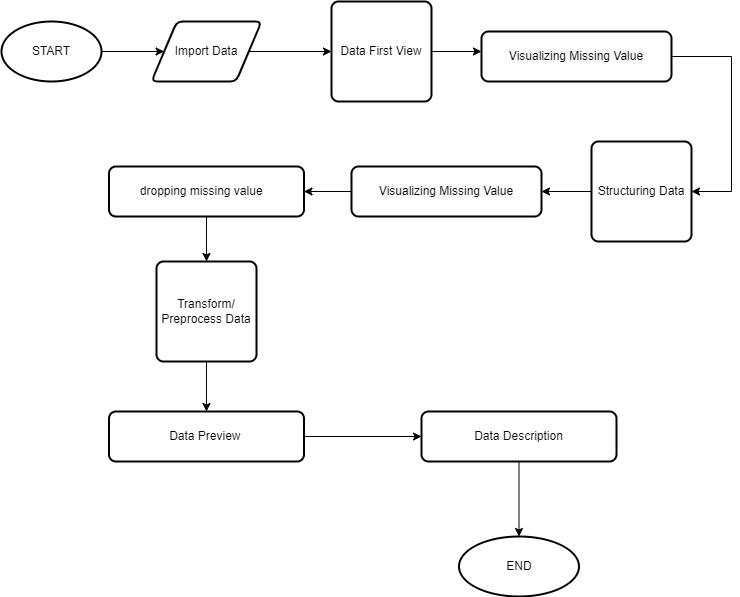

In [1]:
from PIL import Image
img = Image.open("data prep flw chart.drawio.png")
display(img)

This flowchart that summarise the later work of this notebook.

## First View of the data

## Loading Data

In [2]:
import pandas as pd
import numpy as np
from pprint import pprint
data_file_path = ""
csv_file_name = "Austin Bicycle Crashes 2010-2017.csv"
dataset = pd.read_csv(data_file_path+csv_file_name)
dataset.head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Adjusted Average Daily Traffic Amount,Agency,At Intersection Flag,Average Daily Traffic Amount,Average Daily Traffic Year,Case ID,City,...,Roadway Relation,Roadway Type,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,Person Type
0,11243623,No,No,15262,Austin Police Department,False,15262,2014,100010723,Austin,...,On Roadway,"4 Or More Lanes, Undivided",45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged",Pedalcyclist
1,12112069,No,No,No Data,Austin Police Department,False,No Data,No Data,100010834,Austin,...,On Roadway,No Data,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,Pedalcyclist
2,12112069,No,No,No Data,Austin Police Department,False,No Data,No Data,100010834,Austin,...,On Roadway,No Data,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,Pedalcyclist
3,12112069,No,No,No Data,Austin Police Department,False,No Data,No Data,100010834,Austin,...,On Roadway,No Data,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,Pedalcyclist
4,11376123,No,No,22775,Austin Police Department,False,22775,2014,100042009,Austin,...,On Roadway,"4 Or More Lanes, Undivided",45,SL0111,1487,Dry,None,Clear,Not Worn,Pedalcyclist


## Visualizing missing value

<AxesSubplot:>

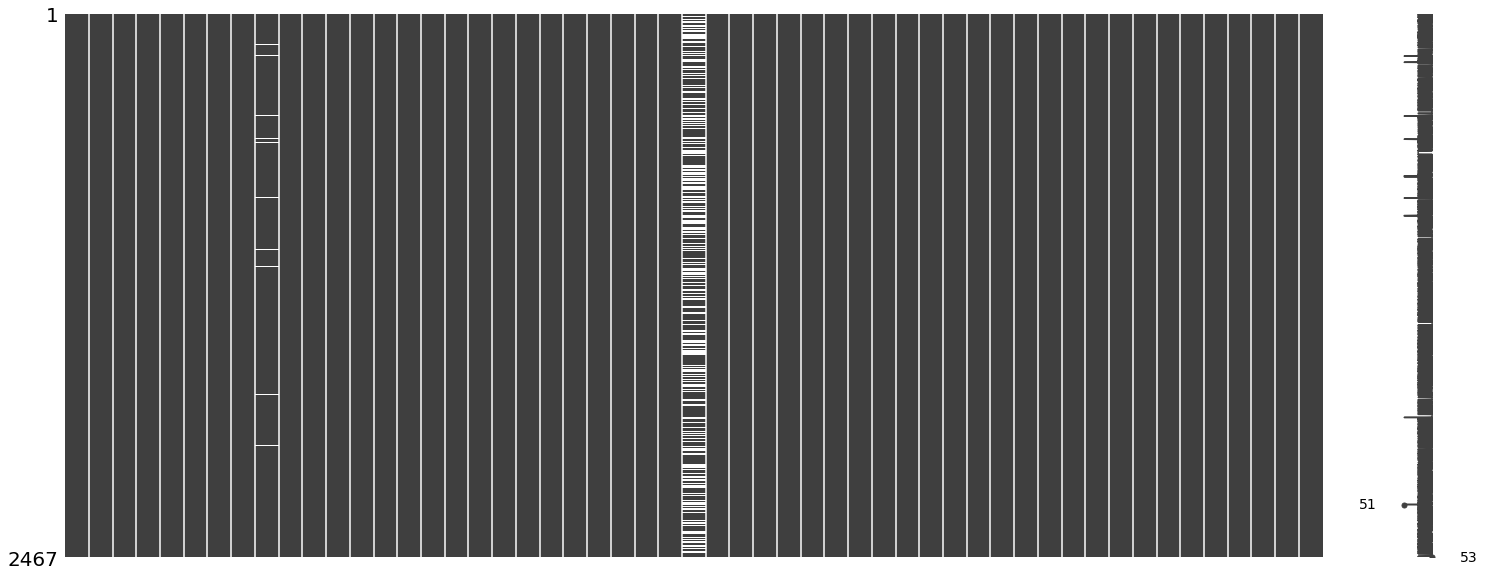

In [3]:
import missingno as msno
msno.matrix(dataset)

The white color represent the missing values, then the 2 columns which contains missing values, they are the Case ID and street name. They will be handled later on.

In [4]:
dataset.count().max() # see there are how records

2467

In [5]:
dataset.dtypes

Crash ID                                      int64
$1000 Damage to Any One Person's Property    object
Active School Zone Flag                      object
Adjusted Average Daily Traffic Amount        object
Agency                                       object
At Intersection Flag                           bool
Average Daily Traffic Amount                 object
Average Daily Traffic Year                   object
Case ID                                      object
City                                         object
Construction Zone Flag                       object
Construction Zone Workers Present Flag       object
County                                       object
Crash Death Count                             int64
Crash Incapacitating Injury Count             int64
Crash Non-incapacitating Injury Count         int64
Crash Not Injured Count                       int64
Crash Possible Injury Count                   int64
Crash Severity                               object
Crash Time  

## Checking Data
Note: it is easier to view the data superficially using Excel.

The data are revised by going through each 10 of all variables, some variable data type and contents are transformed accordingly when suitable.

In [6]:
# uni abbrv. one
uni_col = list(filter(lambda c: len(dataset[c].unique()) == 1, dataset))
uni_dict = {k:dataset[k].unique()[0] for k in uni_col}
uni_dict

{'City': 'Austin',
 'County': 'Travis',
 'Population Group': '250,000 Pop And Over',
 'Person Type': 'Pedalcyclist'}

Above are the columns whose all data is all of a kind, hence can be dropped and added as a remark during the later analysis.

In [7]:
# remove the column that has only one unique data
dataset.drop([col for col in uni_dict],axis = 1, inplace=True)

In [8]:
# replacing the `No data` with NA to represent it is missing value
dataset.replace(["No Data"], pd.NA, inplace=True) 

Remark: There is a field `street number` use `"NO DATA"` and might be up to a interpretation that where `street number` is no applicable to every street. Hence, we keep it as it is, then evaluated later on demand.

In [9]:
# see there are how many variables
len(list(dataset.dtypes))

49

In [10]:
def leg_stepping(start, end,step = 1):
	'''
		eg.: it = leg_stepping(1, 10, 3)
		print(next(it)) -> (1, 4)
		print(next(it)) -> (5, 8)
		print(next(it)) -> (9, 10)
	'''
	assert(start < end)
	while start+step < end:
		yield {"start": start, "end": start+step}
		start += step+1
	yield {"start": start, "end": end}
ind_iter = leg_stepping(0, len(list(dataset.dtypes)), 10)
tmp_viewer = lambda curr: dataset.iloc[:, curr["start"]:curr["end"]]

In [11]:
curr_slice = next(ind_iter)
tmp_viewer(curr_slice).head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Adjusted Average Daily Traffic Amount,Agency,At Intersection Flag,Average Daily Traffic Amount,Average Daily Traffic Year,Case ID,Construction Zone Flag
0,11243623,No,No,15262,Austin Police Department,False,15262,2014,100010723,No
1,12112069,No,No,<NA>,Austin Police Department,False,<NA>,<NA>,100010834,No
2,12112069,No,No,<NA>,Austin Police Department,False,<NA>,<NA>,100010834,No
3,12112069,No,No,<NA>,Austin Police Department,False,<NA>,<NA>,100010834,No
4,11376123,No,No,22775,Austin Police Department,False,22775,2014,100042009,No


Transforming the columns whose domain involve 2 data to binary boolean type, so that they can be processed faster compared to string object

In [12]:
li = ["$1000 Damage to Any One Person's Property", "Active School Zone Flag", "Construction Zone Flag"]
{c:dataset[c].unique() for c in li} # check if binary

{"$1000 Damage to Any One Person's Property": array(['No', 'Yes'], dtype=object),
 'Active School Zone Flag': array(['No', 'Yes'], dtype=object),
 'Construction Zone Flag': array(['No', 'Yes'], dtype=object)}

In [13]:
def booleanize(s, true_corrpd, false_corrpd):
	s = s.replace(true_corrpd, True)
	s = s.replace(false_corrpd, False)
	return s

In [14]:
# changing the yes/no to boolean values
li = ["$1000 Damage to Any One Person's Property", "Active School Zone Flag", "Construction Zone Flag"]
dataset.loc[:,li] = booleanize(dataset.loc[:,li], "Yes", "No")

In [15]:
curr_slice = next(ind_iter)
tmp_viewer(curr_slice)

,Crash Death Count,Crash Incapacitating Injury Count,Crash Non-incapacitating Injury Count,Crash Not Injured Count,Crash Possible Injury Count,Crash Severity,Crash Time,Crash Total Injury Count,Crash Unknown Injury Count,Crash Year
0,0,1,0,0,0,Incapacitating Injury,239,1,1,2010
1,0,0,2,1,0,Non-Incapacitating Injury,310,2,1,2010
2,0,0,2,1,0,Non-Incapacitating Injury,310,2,1,2010
3,0,0,2,1,0,Non-Incapacitating Injury,310,2,1,2010
4,0,0,1,1,0,Non-Incapacitating Injury,2300,1,0,2010
...,...,...,...,...,...,...,...,...,...,...
2462,0,0,1,1,0,Non-Incapacitating Injury,1254,1,0,2017
2463,0,0,1,1,0,Non-Incapacitating Injury,2048,1,0,2017
2464,0,0,0,2,0,Not Injured,737,0,0,2017
2465,0,0,1,1,0,Non-Incapacitating Injury,930,1,0,2017


Convert the column `Crash Time` data to python `time` object

In [16]:
import datetime
converter = lambda n: datetime.time(hour = int(n/100), minute = n%100)
dataset['Crash Time'] = dataset['Crash Time'].apply(converter)

In [17]:
tmp_viewer(curr_slice).dtypes

Crash Death Count                         int64
Crash Incapacitating Injury Count         int64
Crash Non-incapacitating Injury Count     int64
Crash Not Injured Count                   int64
Crash Possible Injury Count               int64
Crash Severity                           object
Crash Time                               object
Crash Total Injury Count                  int64
Crash Unknown Injury Count                int64
Crash Year                                int64
dtype: object

In [18]:
curr_slice = next(ind_iter)
tmp_viewer(curr_slice).head()

,First Harmful Event,Highway System,Intersecting Street Name,Intersection Related,Latitude,Light Condition,Longitude,Manner of Collision,Number of Lanes,Other Factor
0,Pedalcyclist,Farm To Market,NaN,Non Intersection,30.28608823,"Dark, Lighted",-97.6805777,One Motor Vehicle - Going Straight,4,Not Applicable
1,Pedalcyclist,<NA>,NaN,Non Intersection,30.25524478,"Dark, Lighted",-97.74505246,One Motor Vehicle - Going Straight,<NA>,Not Applicable
2,Pedalcyclist,<NA>,NaN,Non Intersection,30.25524478,"Dark, Lighted",-97.74505246,One Motor Vehicle - Going Straight,<NA>,Not Applicable
3,Pedalcyclist,<NA>,NaN,Non Intersection,30.25524478,"Dark, Lighted",-97.74505246,One Motor Vehicle - Going Straight,<NA>,Not Applicable
4,Pedalcyclist,State Loop,E 16TH ST,Intersection Related,30.27959299,"Dark, Not Lighted",-97.70207457,One Motor Vehicle - Going Straight,4,Not Applicable


In [19]:
tmp_viewer(curr_slice).describe()

,First Harmful Event,Highway System,Intersecting Street Name,Intersection Related,Latitude,Light Condition,Longitude,Manner of Collision,Number of Lanes,Other Factor
count,2467,384,1469,2467,2217,2467,2217,2467,353,2467
unique,5,7,545,5,1717,7,1718,10,6,28
top,Pedalcyclist,State Loop,UNKNOWN,Intersection,30.27406572,Daylight,-97.76065126,One Motor Vehicle - Going Straight,4,Not Applicable
freq,2447,161,200,871,16,1717,16,1401,181,1530


In [20]:
dataset["Intersecting Street Name"].replace(np.NAN, pd.NA, inplace=True)

In [21]:
curr_slice = next(ind_iter)
tmp_viewer(curr_slice).head()

,Physical Feature 1,Private Drive Flag,Property Damages,Right of Way Usual Width,Road Class,Roadway Alignment,Roadway Part,Roadway Relation,Roadway Type,Speed Limit
0,Not Applicable,No,NONE,100,Farm To Market,"Straight, Hillcrest",Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45
1,Not Applicable,No,NONE,<NA>,City Street,"Straight, Level",Main/Proper Lane,On Roadway,<NA>,35
2,Not Applicable,No,NONE,<NA>,City Street,"Straight, Level",Main/Proper Lane,On Roadway,<NA>,35
3,Not Applicable,No,NONE,<NA>,City Street,"Straight, Level",Main/Proper Lane,On Roadway,<NA>,35
4,Not Applicable,No,NONE,160,US & State Highways,"Straight, Level",Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45


In [22]:
dataset["Property Damages"].unique()[0:10] # view portion of it

array(['NONE', 'BICYCLE', 'ELECTRONIC PEDESTRIAN SIGNAL, FIRE HYDRANT',
       'BLUE BICYCLE', 'SCWINN ROAD BIKE', 'MOUNTAIN BIKE',
       'BICYCLE FORKS AND BENT RIM', 'DAMAGE TO BICYCLE', 'BIKE',
       'BICYCLE IS COMPLETELY BROKEN APART'], dtype=object)

In [23]:
dataset["Property Damages"].describe() # there are 83 unique data relatively to the 2152 count

count     2152
unique      83
top       NONE
freq      1993
Name: Property Damages, dtype: object

In [24]:
li = ["Private Drive Flag"]
dataset.loc[:,li] = booleanize(dataset.loc[:,li], "Yes", "No")

In [25]:
curr_slice = next(ind_iter)
tmp_viewer(curr_slice).head()

,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,4716,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,200,Dry,Center Stripe/Divider,Clear,Not Worn
2,200,Dry,Center Stripe/Divider,Clear,Not Worn
3,200,Dry,Center Stripe/Divider,Clear,Not Worn
4,1487,Dry,None,Clear,Not Worn


In [26]:
tmp_viewer(curr_slice).dtypes

Street Number           object
Surface Condition       object
Traffic Control Type    object
Weather Condition       object
Person Helmet           object
dtype: object

In [27]:
# see domain of these columns
s = ['Surface Condition','Traffic Control Type','Weather Condition','Person Helmet']
{c:dataset[c].unique() for c in s}

{'Surface Condition': array(['Dry', 'Wet', 'Unknown', 'Other (Explain In Narrative)', 'Ice',
        'Sand, Mud, Dirt', 'Standing Water'], dtype=object),
 'Traffic Control Type': array(['Marked Lanes', 'Center Stripe/Divider', 'None', 'Signal Light',
        'Stop Sign', 'Other (Explain In Narrative)', 'Officer',
        'Crosswalk', 'Yield Sign', 'Bike Lane',
        'Signal Light With Red Light Running Camera', 'Warning Sign',
        'Flagman', 'Flashing Red Light', 'Flashing Yellow Light',
        'No Passing Zone'], dtype=object),
 'Weather Condition': array(['Clear', 'Rain', 'Cloudy', 'Unknown', 'Fog',
        'Other (Explain In Narrative)', 'Blowing Sand/Snow'], dtype=object),
 'Person Helmet': array(['Worn, Damaged', 'Not Worn', 'Worn, Unk Damage', 'Unknown If Worn',
        'Worn, Not Damaged'], dtype=object)}

In [28]:
dataset.head() # see the revised dataframe

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Adjusted Average Daily Traffic Amount,Agency,At Intersection Flag,Average Daily Traffic Amount,Average Daily Traffic Year,Case ID,Construction Zone Flag,...,Roadway Part,Roadway Relation,Roadway Type,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,11243623,False,False,15262,Austin Police Department,False,15262,2014,100010723,False,...,Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,12112069,False,False,<NA>,Austin Police Department,False,<NA>,<NA>,100010834,False,...,Main/Proper Lane,On Roadway,<NA>,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
2,12112069,False,False,<NA>,Austin Police Department,False,<NA>,<NA>,100010834,False,...,Main/Proper Lane,On Roadway,<NA>,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
3,12112069,False,False,<NA>,Austin Police Department,False,<NA>,<NA>,100010834,False,...,Main/Proper Lane,On Roadway,<NA>,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
4,11376123,False,False,22775,Austin Police Department,False,22775,2014,100042009,False,...,Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,SL0111,1487,Dry,None,Clear,Not Worn


In [29]:
uni_dict

{'City': 'Austin',
 'County': 'Travis',
 'Population Group': '250,000 Pop And Over',
 'Person Type': 'Pedalcyclist'}

In [30]:
def save_df_csv(csv_str, file_name, path=""):
	f = open(path+file_name, "w")
	f.write(csv_str)
	f.close()

extract_file_name = lambda f: f.split(".")[0]
save_df_csv(dataset.to_csv(index=False, line_terminator="\n"),
file_name=f"{extract_file_name(csv_file_name)} revised.csv")

## Preview Integer Attribute

In [31]:
li = ['Crash Death Count', 
	'Crash Incapacitating Injury Count', 
	'Crash Non-incapacitating Injury Count', 
	'Crash Not Injured Count', 
	'Crash Possible Injury Count',
	'Crash Total Injury Count', 
	'Crash Unknown Injury Count']
dataset[li].describe()

,Crash Death Count,Crash Incapacitating Injury Count,Crash Non-incapacitating Injury Count,Crash Not Injured Count,Crash Possible Injury Count,Crash Total Injury Count,Crash Unknown Injury Count
count,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000
mean,0.006486,0.191731,0.636400,1.208350,0.262262,1.090393,0.158897
std,0.080288,1.161059,0.564872,0.931757,0.486358,1.208050,0.416466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,14.000000,4.000000,9.000000,5.000000,15.000000,4.000000


## Cleaning and Pre-process of the Data

In [32]:
import pandas as pd
import numpy as np
from pprint import pprint
data_file_path = ""
csv_file_name = "Austin Bicycle Crashes 2010-2017 revised.csv"
dataset = pd.read_csv(data_file_path+csv_file_name)
dataset.head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Adjusted Average Daily Traffic Amount,Agency,At Intersection Flag,Average Daily Traffic Amount,Average Daily Traffic Year,Case ID,Construction Zone Flag,...,Roadway Part,Roadway Relation,Roadway Type,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,11243623,False,False,15262.0,Austin Police Department,False,15262.0,2014.0,100010723,False,...,Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,12112069,False,False,NaN,Austin Police Department,False,NaN,NaN,100010834,False,...,Main/Proper Lane,On Roadway,NaN,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
2,12112069,False,False,NaN,Austin Police Department,False,NaN,NaN,100010834,False,...,Main/Proper Lane,On Roadway,NaN,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
3,12112069,False,False,NaN,Austin Police Department,False,NaN,NaN,100010834,False,...,Main/Proper Lane,On Roadway,NaN,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
4,11376123,False,False,22775.0,Austin Police Department,False,22775.0,2014.0,100042009,False,...,Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,SL0111,1487,Dry,None,Clear,Not Worn


### Enforcing Primary Key constraint

<AxesSubplot:>

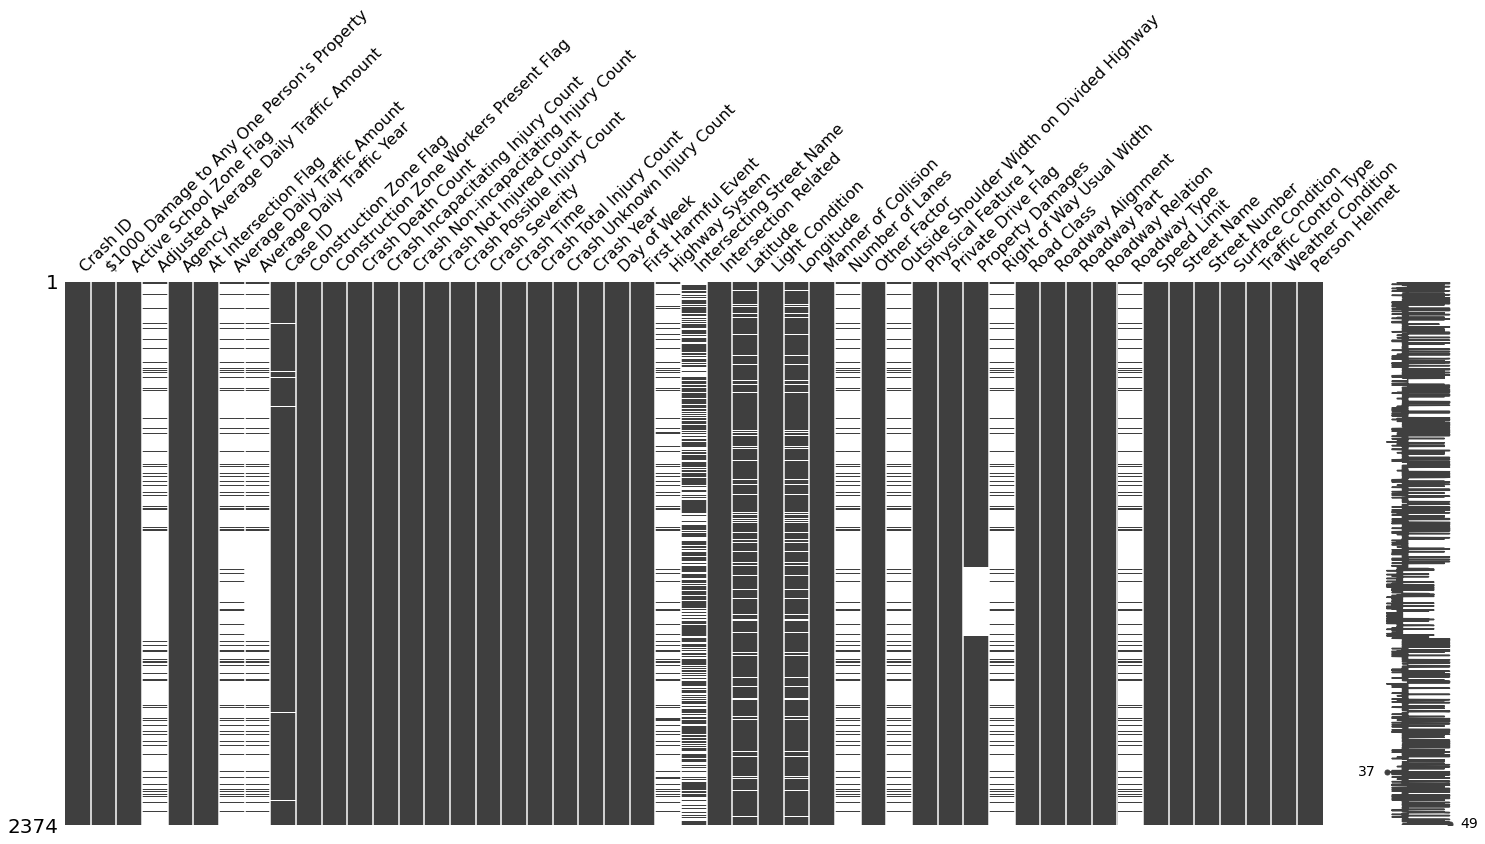

In [33]:
dataset.drop_duplicates('Crash ID', inplace=True) # assuming Crash ID is the primary key
# Visualising missing value
import missingno as msno
msno.matrix(dataset)

<AxesSubplot:>

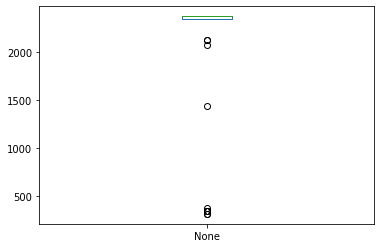

In [34]:
# another visualization of missing values based on counting
dataset.count().plot.box()

### Dropping Column

In [35]:
# from previous boxplot, we decide to drop the columns whose counts less then 2000
# (i.e.: having too much missing value)
li = filter(lambda col_nm: dataset[col_nm].count() < 2000, dataset)
li = list(li)
li # the list of columns will be drop

['Adjusted Average Daily Traffic Amount',
 'Average Daily Traffic Amount',
 'Average Daily Traffic Year',
 'Highway System',
 'Intersecting Street Name',
 'Number of Lanes',
 'Outside Shoulder Width on Divided Highway',
 'Right of Way Usual Width',
 'Roadway Type']

In [36]:
dataset.drop(li, axis=1, inplace=True)

In [37]:
dataset.count(1)[0] # number of variables

40

<AxesSubplot:>

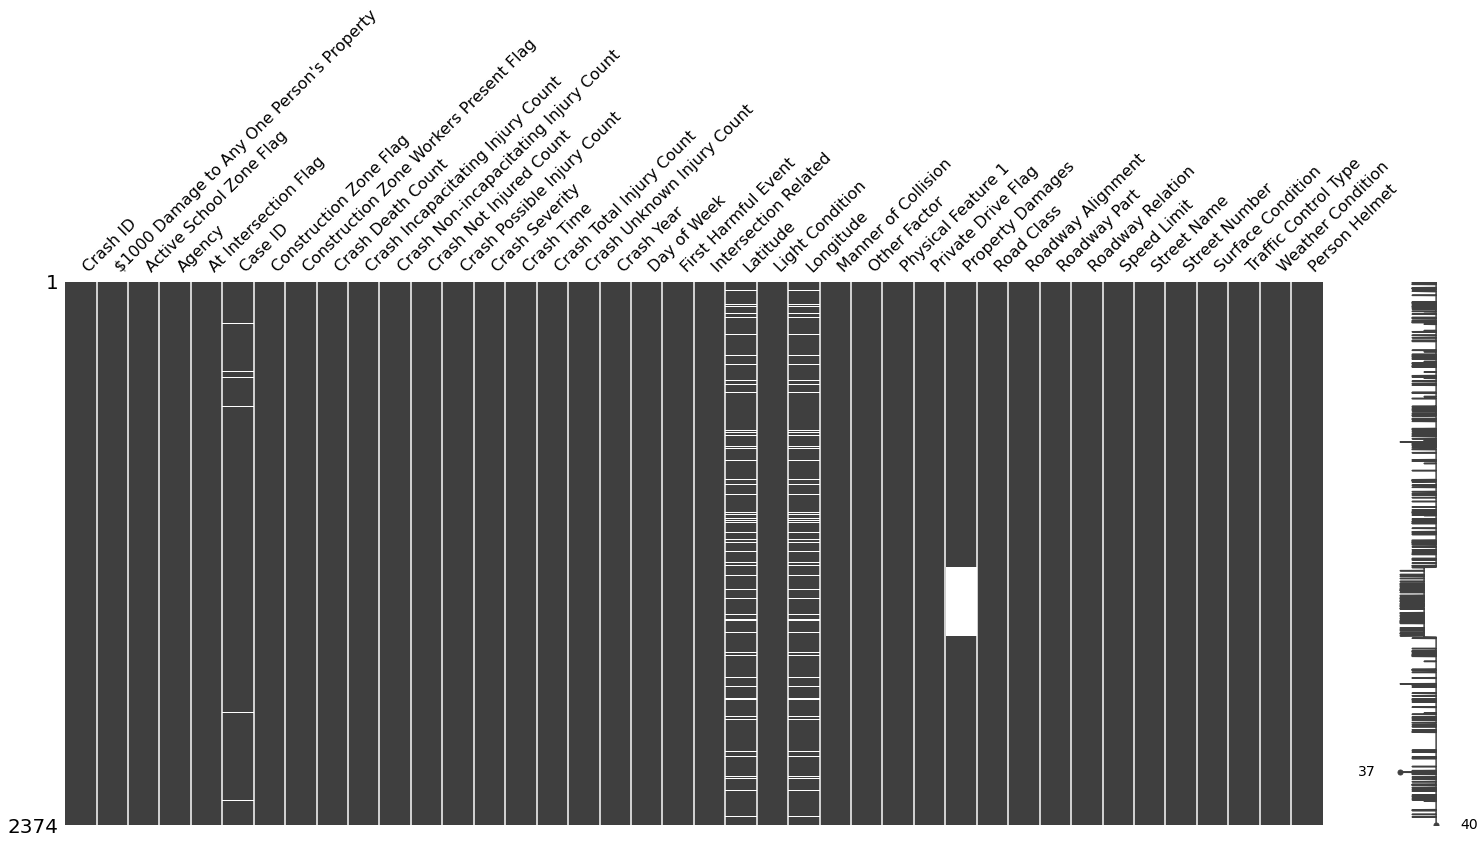

In [38]:
import missingno as msno
msno.matrix(dataset)

### Dropping Row

<AxesSubplot:>

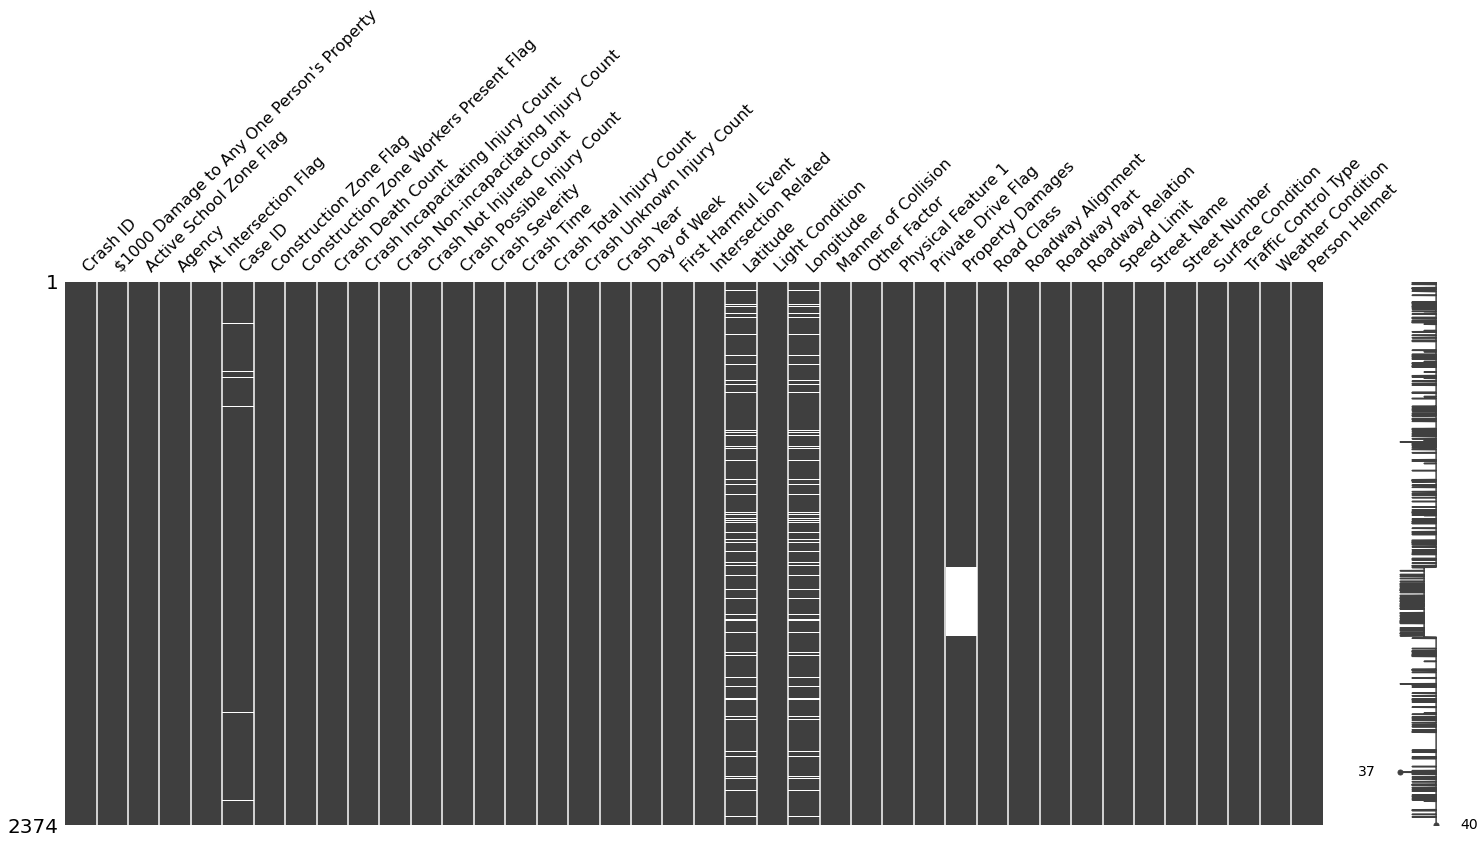

In [39]:
msno.matrix(dataset)

<AxesSubplot:>

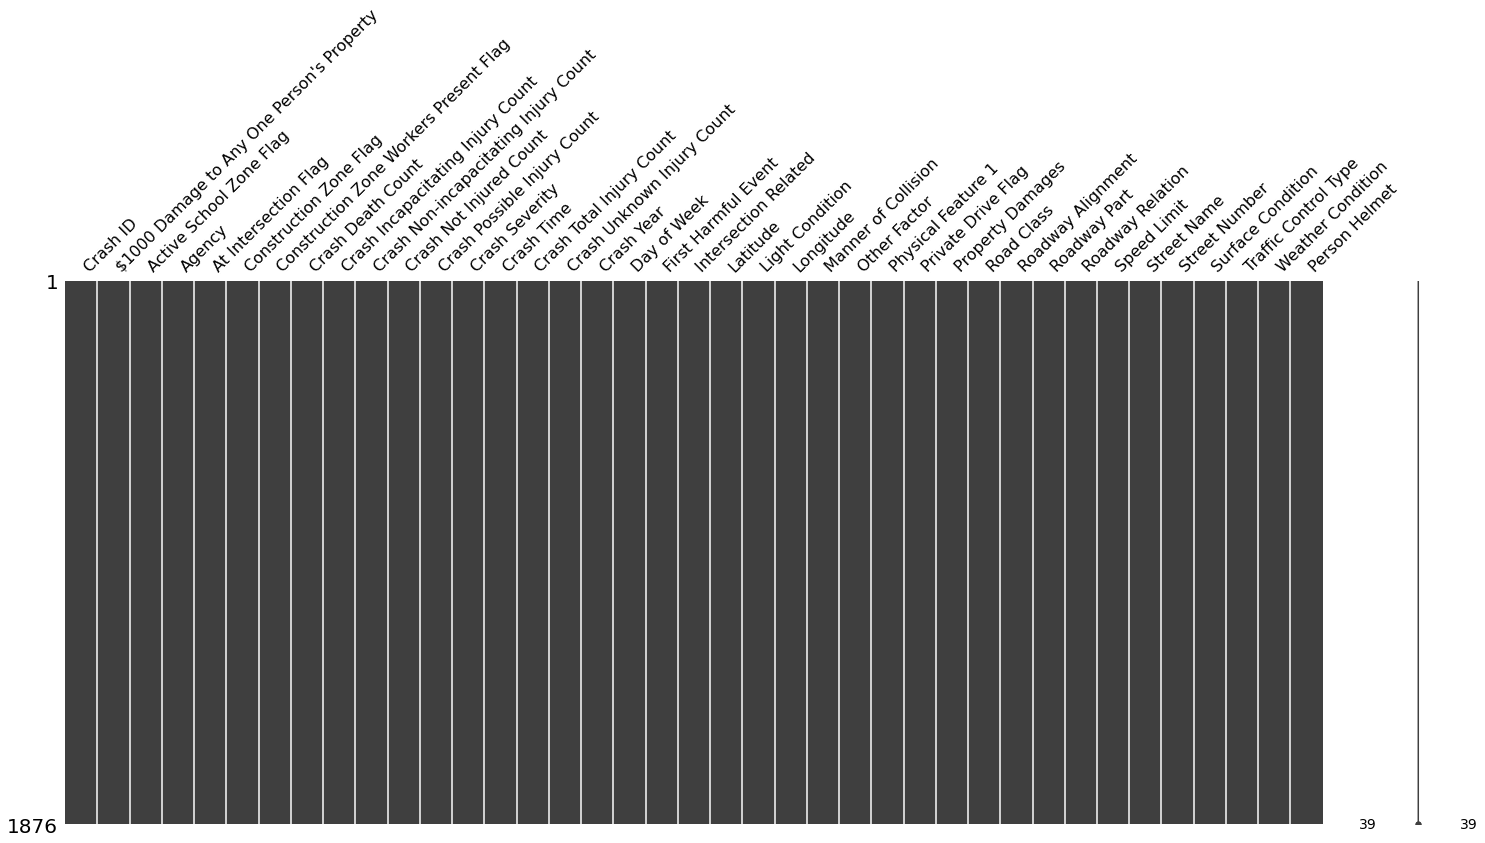

In [40]:
# we may assume that Crash ID is the primary key
# hence drop Case ID
dataset.drop("Case ID", axis=1, inplace = True) 
dataset = dataset.dropna()
msno.matrix(dataset)

We have reach at the point where there is no obvious missing data, thus the data is cleaner than initially.

## Transforming longitude, latitude

The transformed data have their use in visualizing map

In [41]:
from pyproj import Proj, transform
# cartography(map making field), all maps are projected
# then we use Mercator projection here
lons, lats = [], []
inProj = Proj(init='epsg:3857')
outProj = Proj(init='epsg:4326')
for lon, lat in list(zip(dataset["Longitude"], dataset["Latitude"])):
    x, y = transform(outProj,inProj,lon,lat)
    lons.append(x)
    lats.append(y)
dataset["MercatorX"] = lons
dataset["MercatorY"] = lats

C:\Users\Leong Teng Man\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Leong Teng Man\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\LEONGT~1\AppData\Local\Temp/ipykernel_11640/1622515699.py:8: DeprecationWarning: This function is deprecated. See: https://pyproj4.gi

## Saving file

In [42]:
def save_df_csv(csv_str, file_name, path=""):
	f = open(path+file_name, "w")
	f.write(csv_str)
	f.close()
extract_file_name = lambda f: f.split(".")[0]
save_df_csv(dataset.to_csv(index=False, line_terminator="\n"),
file_name=f"{extract_file_name(csv_file_name)} subset.csv")

## To discover outlier

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pprint
%matplotlib inline

In [44]:
url = "https://raw.githubusercontent.com/taimoon/data-wrangling-school-project/main/Austin%20Bicycle%20Crashes%202010-2017%20revised%20subset.csv"
df=pd.read_csv(url)
df.head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Agency,At Intersection Flag,Construction Zone Flag,Construction Zone Workers Present Flag,Crash Death Count,Crash Incapacitating Injury Count,Crash Non-incapacitating Injury Count,...,Roadway Relation,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,MercatorX,MercatorY
0,11243623,False,False,Austin Police Department,False,False,No,0,1,0,...,On Roadway,45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged",-1.087375e+07,3.540377e+06
1,12112069,False,False,Austin Police Department,False,False,No,0,0,2,...,On Roadway,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,-1.088093e+07,3.536402e+06
2,11376123,False,False,Austin Police Department,False,False,No,0,0,1,...,On Roadway,45,SL0111,1487,Dry,None,Clear,Not Worn,-1.087615e+07,3.539540e+06
3,11318193,False,False,Austin Police Department,False,False,No,0,0,1,...,On Roadway,35,W MARTIN LUTHER KING JR BLVD,398,Dry,Marked Lanes,Clear,"Worn, Unk Damage",-1.088053e+07,3.539795e+06
4,11286981,False,False,Austin Police Department,True,False,No,0,0,1,...,On Roadway,30,VICTORY DR,3801,Dry,Stop Sign,Clear,Not Worn,-1.088577e+07,3.534194e+06


In [45]:
#create a list  for column indexing
outlier_col=["Crash Death Count","Crash Incapacitating Injury Count","Crash Non-incapacitating Injury Count",
             "Crash Not Injured Count","Crash Possible Injury Count","Crash Total Injury Count",
             "Crash Unknown Injury Count","Speed Limit" ]
print(len(outlier_col))

8


In [46]:
#create a dict to store location of outlier
out_dict = {}
new_key=0
for b in outlier_col:
    z = np.abs(stats.zscore(df[b]))
    out_index= np.where(z>3)
    
    # add into dictionary
    new_key+=1
    out_dict[b] = out_index


pprint.pprint(out_dict)

{'Crash Death Count': (array([ 100,  107,  316,  384,  562,  763,  802,  984, 1222, 1351, 1582,
       1611, 1664, 1682, 1814], dtype=int64),),
 'Crash Incapacitating Injury Count': (array([ 539, 1743, 1812], dtype=int64),),
 'Crash Non-incapacitating Injury Count': (array([ 133,  674,  841, 1518], dtype=int64),),
 'Crash Not Injured Count': (array([  15,   17,   43,  154,  166,  179,  240,  300,  328,  387,  402,
        448,  457,  469,  471,  574,  605,  615,  624,  626,  636,  647,
        649,  657,  679,  689,  690,  742,  773,  787,  909,  933,  959,
       1005, 1024, 1090, 1133, 1141, 1159, 1169, 1174, 1231, 1245, 1285,
       1296, 1299, 1427, 1429, 1516, 1517, 1544, 1562, 1593, 1671, 1718,
       1760, 1818, 1820], dtype=int64),),
 'Crash Possible Injury Count': (array([ 215,  269,  377,  493,  626,  891, 1041, 1051, 1061, 1170, 1218,
       1253, 1296, 1517, 1619, 1641, 1748], dtype=int64),),
 'Crash Total Injury Count': (array([ 133,  269,  493,  499,  539,  626,  674,  84

In [47]:
#to extract outlier value

for b in outlier_col:
    print("Outlier value for " + b)
    print(df[b].iloc[out_dict[b]])
    print(" ")
    print("-------------------------------------------------------------- ")

Outlier value for Crash Death Count
100     1
107     1
316     1
384     1
562     1
763     1
802     1
984     1
1222    1
1351    1
1582    1
1611    1
1664    1
1682    1
1814    1
Name: Crash Death Count, dtype: int64
 
-------------------------------------------------------------- 
Outlier value for Crash Incapacitating Injury Count
539     14
1743     3
1812     2
Name: Crash Incapacitating Injury Count, dtype: int64
 
-------------------------------------------------------------- 
Outlier value for Crash Non-incapacitating Injury Count
133     3
674     4
841     3
1518    3
Name: Crash Non-incapacitating Injury Count, dtype: int64
 
-------------------------------------------------------------- 
Outlier value for Crash Not Injured Count
15      4
17      4
43      4
154     5
166     4
179     4
240     4
300     4
328     4
387     5
402     7
448     5
457     4
469     4
471     4
574     4
605     6
615     6
624     4
626     7
636     5
647     4
649     6
657     4
679

In [48]:
#In the latest version of Pandas there is an easy way to do exactly this. 
#Column names (which are strings) can be sliced in whatever manner you like
df_measures= pd.DataFrame(df, columns=outlier_col)

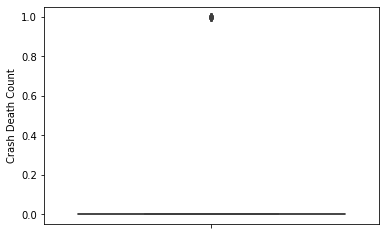

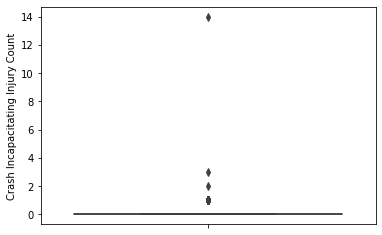

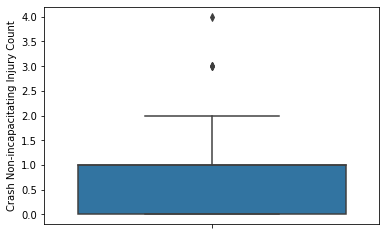

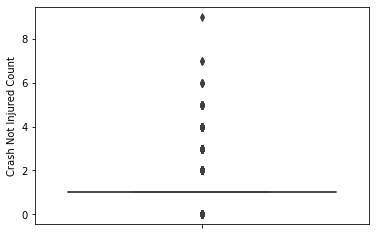

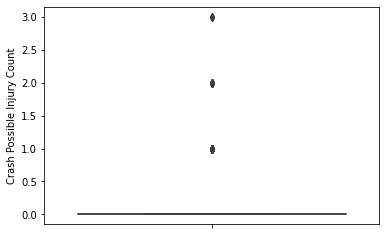

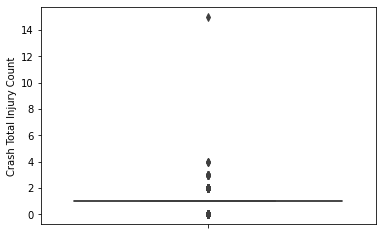

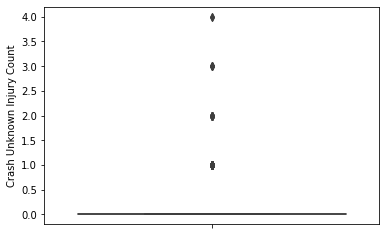

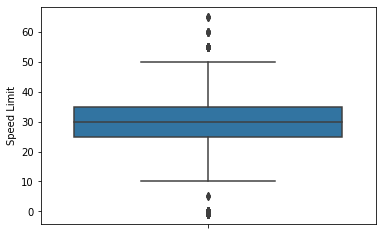

<Figure size 432x288 with 0 Axes>

In [49]:
#Box Plot
for col in outlier_col:
    sns.boxplot( y=df[col] )
    plt.figure()   # plots figure for each iteration

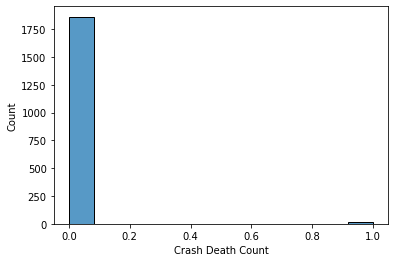

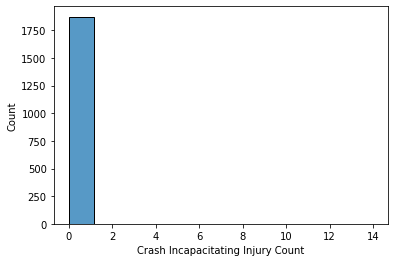

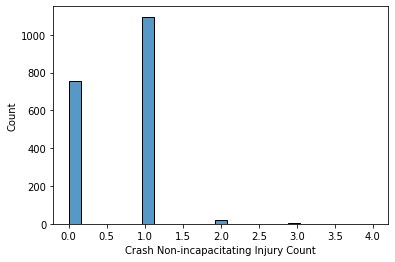

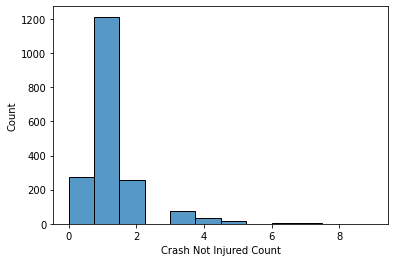

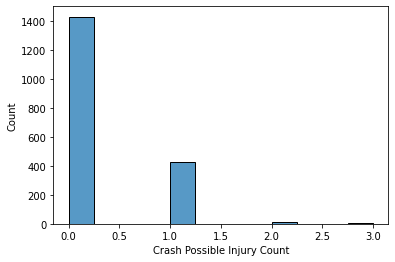

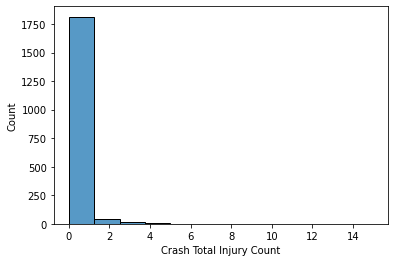

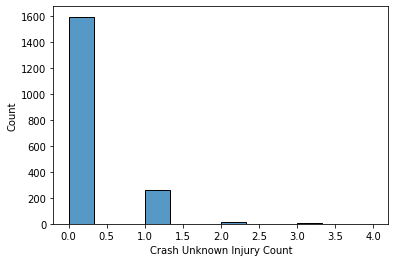

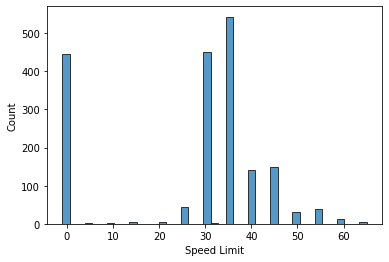

<Figure size 432x288 with 0 Axes>

In [50]:
#Histogram
for col in outlier_col:
    sns.histplot(data=df[col])
    plt.figure()   # plots figure for each iteration

In the section of "To discover outlier", we naviely mark the outlier data for each integer attribute using 3 standard deviation standard, and also boxplot. These results distoreted visual graphs. 

Hence we decide to plot histogram for each integer attribute. We see that histogram able to reflect more on the data distribution than abstract boxplot. For crash related integer (i.e.: excluding speed limit), their outliers does not really distort the mean and standard deviation, thus we decide to keep them.

From the histogram of speed limit, we suspect the speed limit of 0 is the case of having no speed regulation for the road.

## Relationship Between Variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


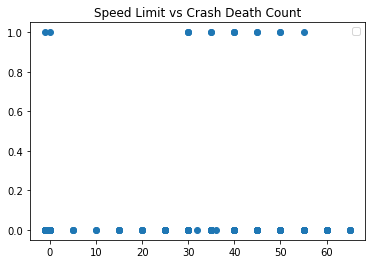

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


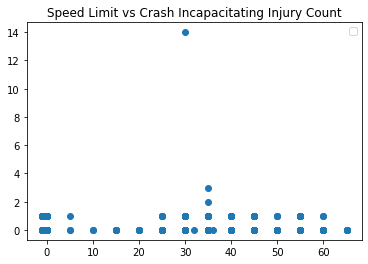

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


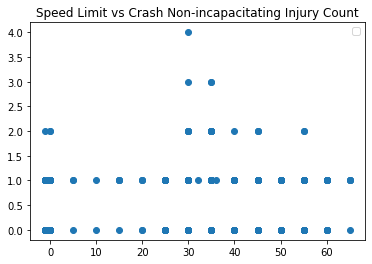

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


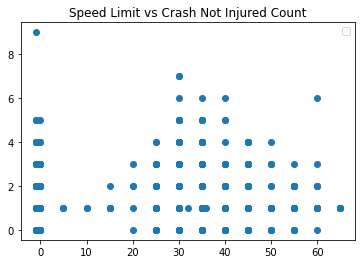

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


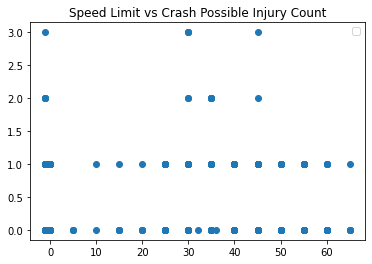

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


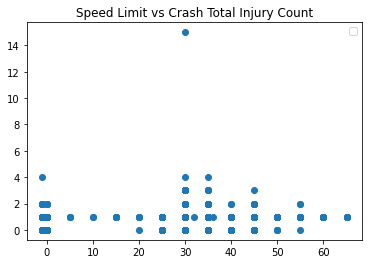

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


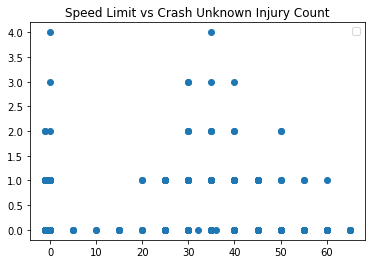

In [51]:
x_col = "Speed Limit"
y_columns = ["Crash Death Count","Crash Incapacitating Injury Count","Crash Non-incapacitating Injury Count",
             "Crash Not Injured Count","Crash Possible Injury Count","Crash Total Injury Count",
             "Crash Unknown Injury Count"]

outlier_col=["Crash Death Count","Crash Incapacitating Injury Count","Crash Non-incapacitating Injury Count",
             "Crash Not Injured Count","Crash Possible Injury Count","Crash Total Injury Count",
             "Crash Unknown Injury Count","Speed Limit" ]
for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df[x_col], df[y_col])
    #ax.set_xlabel(x_col)
    #ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.legend()
    plt.show()

We see that there is no obvious correlations between speed limit and various integer attributes. Indeed, speed limit is really applicable to cyclist as they are not able ride that fast. Additionally, speed limit may not really imply how fast the invovled vehicle is drove considering the possibility of violating the rules.

In [52]:
import pandas as pd
import seaborn as sb

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/taimoon/data-wrangling-school-project/main/Austin%20Bicycle%20Crashes%202010-2017%20revised%20subset.csv")
df.head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Agency,At Intersection Flag,Construction Zone Flag,Construction Zone Workers Present Flag,Crash Death Count,Crash Incapacitating Injury Count,Crash Non-incapacitating Injury Count,...,Roadway Relation,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,MercatorX,MercatorY
0,11243623,False,False,Austin Police Department,False,False,No,0,1,0,...,On Roadway,45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged",-1.087375e+07,3.540377e+06
1,12112069,False,False,Austin Police Department,False,False,No,0,0,2,...,On Roadway,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,-1.088093e+07,3.536402e+06
2,11376123,False,False,Austin Police Department,False,False,No,0,0,1,...,On Roadway,45,SL0111,1487,Dry,None,Clear,Not Worn,-1.087615e+07,3.539540e+06
3,11318193,False,False,Austin Police Department,False,False,No,0,0,1,...,On Roadway,35,W MARTIN LUTHER KING JR BLVD,398,Dry,Marked Lanes,Clear,"Worn, Unk Damage",-1.088053e+07,3.539795e+06
4,11286981,False,False,Austin Police Department,True,False,No,0,0,1,...,On Roadway,30,VICTORY DR,3801,Dry,Stop Sign,Clear,Not Worn,-1.088577e+07,3.534194e+06


<AxesSubplot:>

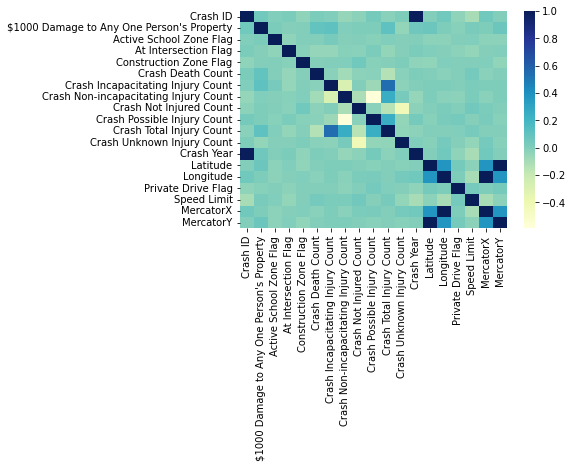

In [54]:
# let we present by heat map

sb.heatmap(df.corr(),cmap="YlGnBu")

In the above particular heatmap with this color map, the dark color means that the correlation is very high. Our diagonal is of course very dark and then we can see that **between crash total injury count and Crash Incapacitating Injury Count** got also dark blue cube, which means that they are very correlative.

The combination between "longitude and latitude" and "MercatorY and MercatorX" are correlated together too. This is because "MercatorY and MercatorX" are the transformed value from "longitude and latitude

In [55]:
# let we just select particular row
list_selected=["Crash Total Injury Count", "Crash Unknown Injury Count", "Speed Limit"]
df_selected=pd.DataFrame(df, columns=list_selected)
df_selected.head()

,Crash Total Injury Count,Crash Unknown Injury Count,Speed Limit
0,1,1,45
1,2,1,35
2,1,0,45
3,1,0,35
4,1,1,30


<AxesSubplot:>

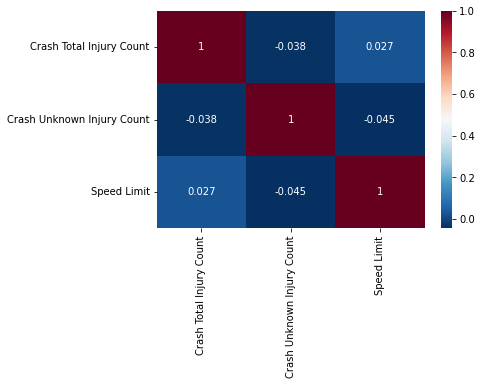

In [56]:
sb.heatmap(df_selected.corr(),cmap="RdBu_r", annot=True)

To zoom in more details, it is clearly show there are no correlation between Crash Total ijury Count, Crash unknown injury count and speed limit.

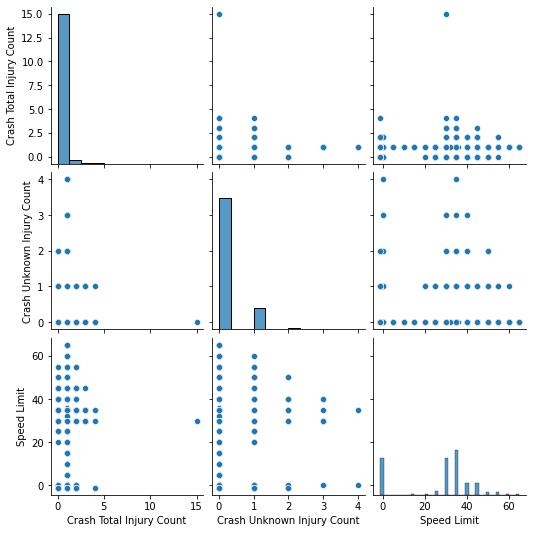

In [57]:
sb.pairplot(df_selected)

Now, we will run a pairplot, which takes every two variables and shows us their scatter versus each other.

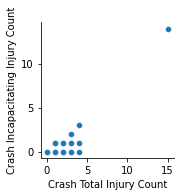

In [58]:
# let create pairplot for crash total injury count and Crash Incapacitating Injury Count.

sb.pairplot(df,
    x_vars="Crash Total Injury Count",
    y_vars="Crash Incapacitating Injury Count",
    diag_kws={'bins':30}
)

When we go deep into the correlation between rash total injury count and Crash Incapacitating Injury Count, we cannot make statement that they have correlation. This is because they creates the plot without the regression line.

# Exploratory Data Analysis

Produce and explain all graphs, diagram, or any visualization materials that you produce in your assignment

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pprint
import plotly.express as px
from pywaffle import Waffle
import squarify
%matplotlib inline

In [ ]:
url = "https://raw.githubusercontent.com/taimoon/data-wrangling-school-project/main/Austin%20Bicycle%20Crashes%202010-2017%20revised%20subset.csv"
df=pd.read_csv(url)

## Composition Chart for Categorical Variable

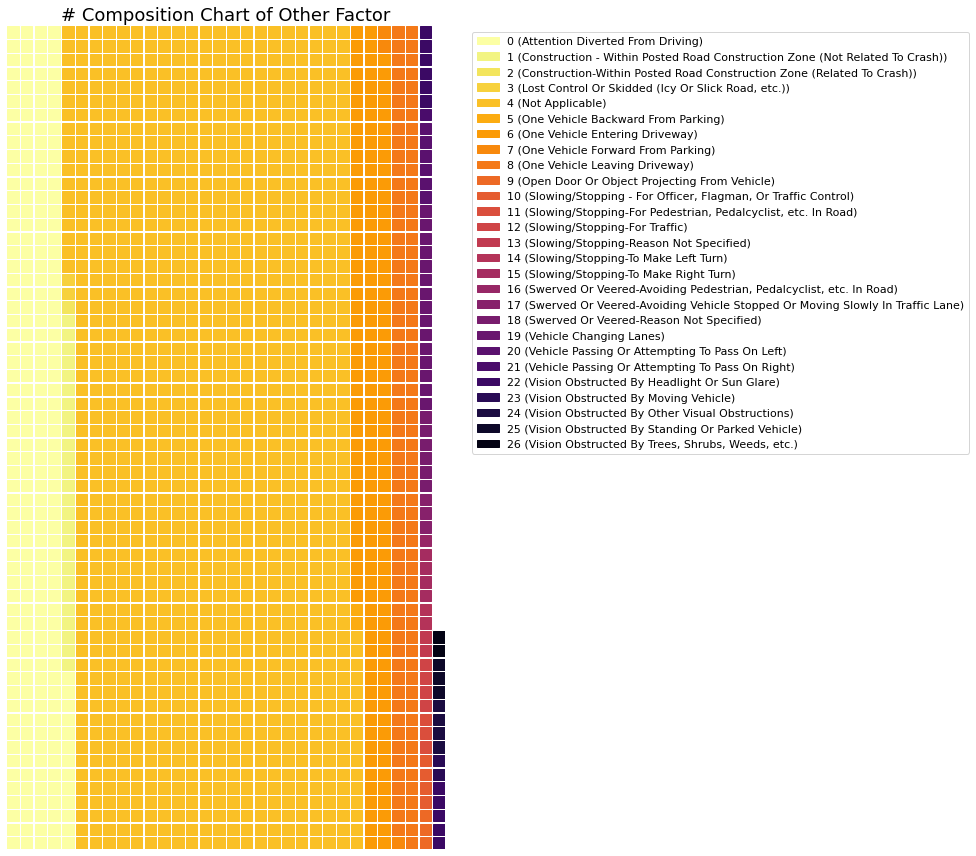

In [ ]:
dff = df.groupby("Other Factor").size().reset_index(name='counts')
n_categories = dff.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values': dff['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in dff[["Other Factor", 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 11},
            'title': {'label': '# Composition Chart of Other Factor', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=60,
    colors=colors,
    figsize=(50, 12)
)

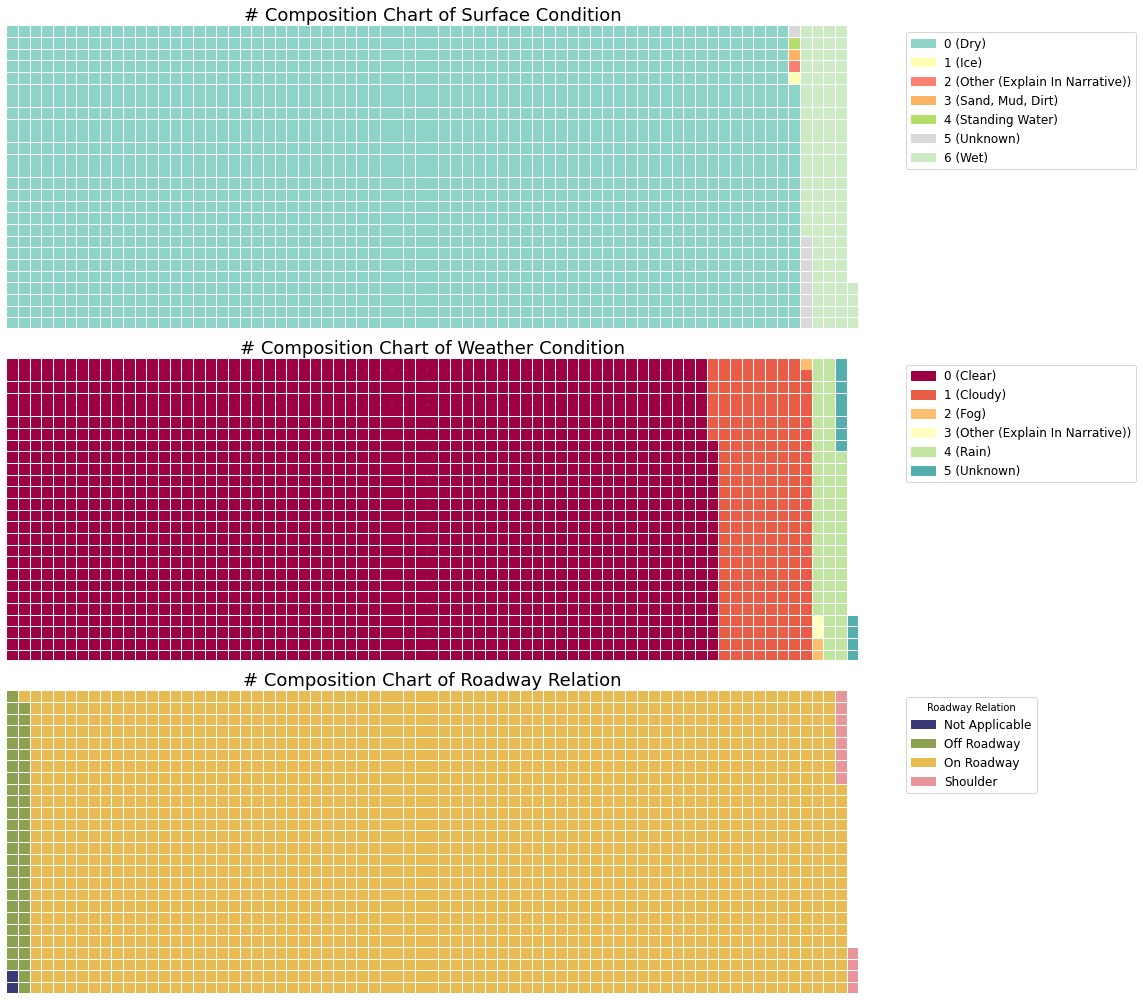

In [ ]:
# Prepare Data
# By Surface Condition Data
dff = df.groupby("Surface Condition").size().reset_index(name='counts')
n_categories = dff.shape[0]
colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

# By Weather Condition Data
dff1 = df.groupby("Weather Condition").size().reset_index(name='counts')
n_categories = dff1.shape[0]
colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]

# By Make Data
dff2 = df.groupby('Roadway Relation').size().reset_index(name='counts')
n_categories = dff2.shape[0]
colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]      
    

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            'values': dff['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in dff[["Surface Condition", 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Composition Chart of Surface Condition', 'loc': 'center', 'fontsize':18},
            'colors': colors_class
        },
        312: {
            'values': dff1['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in dff1[["Weather Condition",'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Composition Chart of Weather Condition', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        313: {
            'values': dff2['counts'],
            'labels': ["{1}".format(n[0], n[1]) for n in dff2[['Roadway Relation', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':"Roadway Relation"},
            'title': {'label': '# Composition Chart of Roadway Relation', 'loc': 'center', 'fontsize':18},
            'colors': colors_make
        }
    },
    rows=26,
    figsize=(16, 14)
)

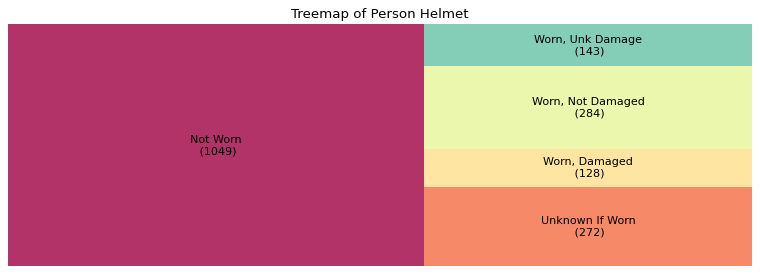

In [ ]:
# Prepare Data
df_tree = df.groupby('Person Helmet').size().reset_index(name='counts')
labels = df_tree.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_tree['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,4), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Person Helmet')
plt.axis('off')
plt.show()


## Visualization for Crash Death and Crash Total Injury by Categorical Variable

### By Categorical Variable Weather Condition 

In [ ]:
#prepare data
df_pre1 = df[['Crash Death Count','Weather Condition']].groupby(by='Weather Condition').sum()
df_pre1.sort_values('Crash Death Count', inplace=True)
df_pre1.reset_index(inplace=True)

fig = px.bar(df_pre1, x='Weather Condition', y='Crash Death Count',title='Crash Death Count by Weather Condition')

fig.show()

In [ ]:
#prepare data
df_pre1 = df[['Crash Total Injury Count','Weather Condition']].groupby(by='Weather Condition').sum()
df_pre1.sort_values('Crash Total Injury Count', inplace=True)
df_pre1.reset_index(inplace=True)

fig = px.bar(df_pre1, x='Weather Condition', y='Crash Total Injury Count',title='Crash Total Injury Count by Weather Condition')

fig.show()

### By Categorical Variable Surface Condition

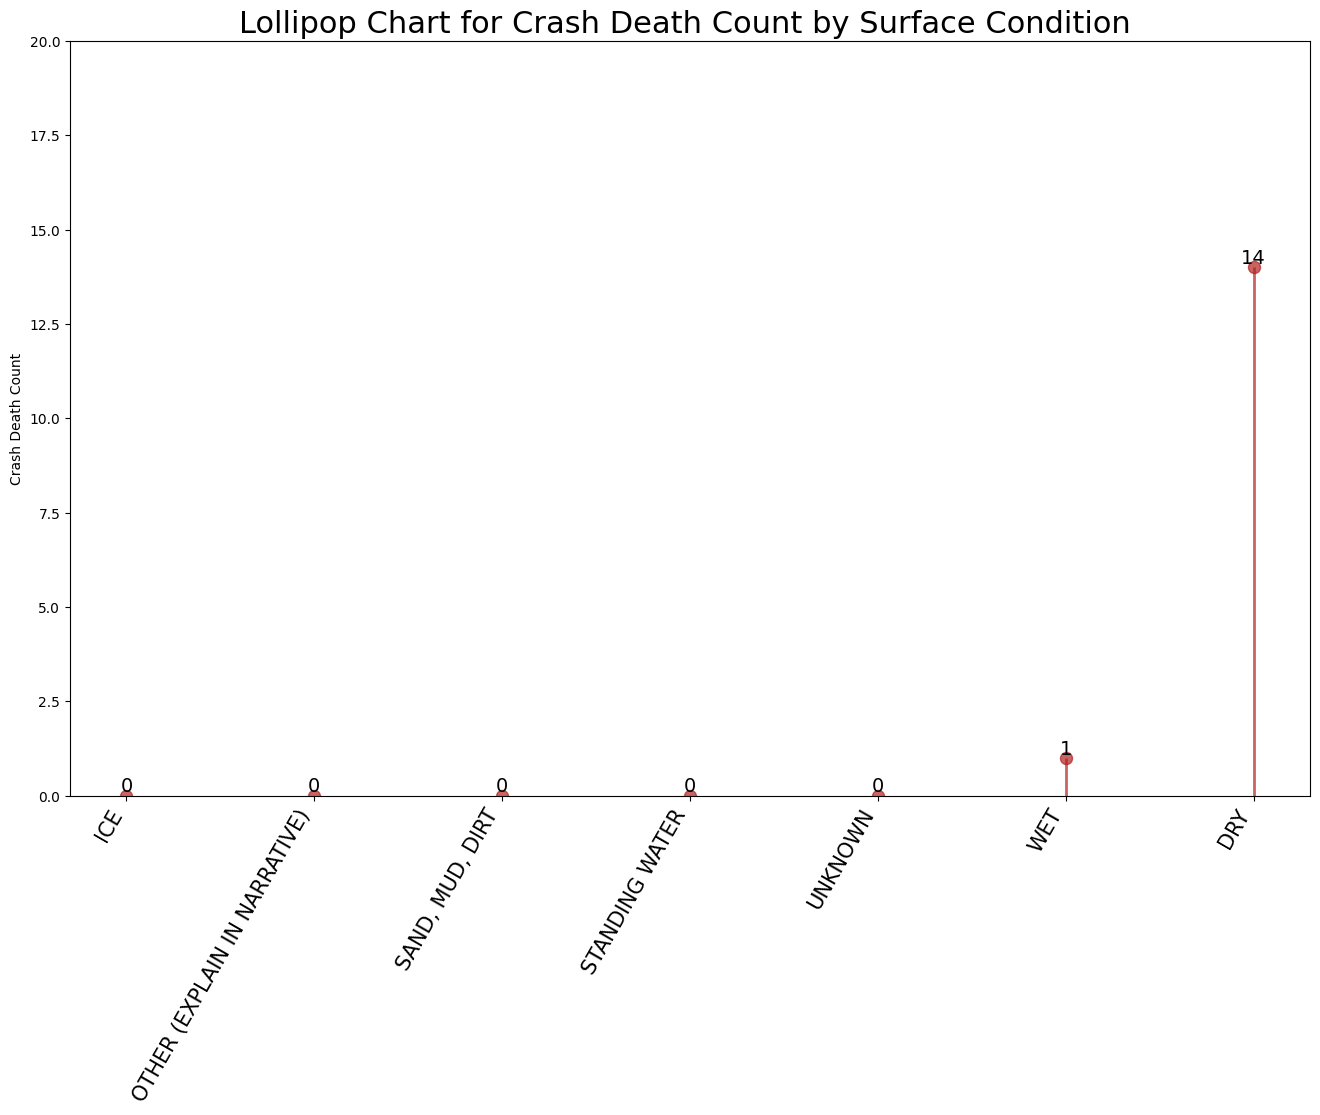

In [ ]:
#prepare data
df_pre = df[['Crash Death Count','Surface Condition']].groupby(by='Surface Condition').sum()
df_pre.sort_values('Crash Death Count', inplace=True)
df_pre.reset_index(inplace=True)
df_pre

#plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.vlines(x=df_pre.index, ymin=0, ymax=df_pre['Crash Death Count'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df_pre.index, y=df_pre['Crash Death Count'], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Crash Death Count by Surface Condition ', fontdict={'size':22})
ax.set_ylabel('Crash Death Count')
ax.set_xticks(df_pre.index)
ax.set_xticklabels(df_pre["Surface Condition"].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':15})
ax.set_ylim(0,20)

# Annotate
for row in df_pre.itertuples():
    ax.text(row.Index, row._2, 
    s=round(row._2,4),
    horizontalalignment= 'center',
    verticalalignment= "bottom", fontsize=14)

plt.show()

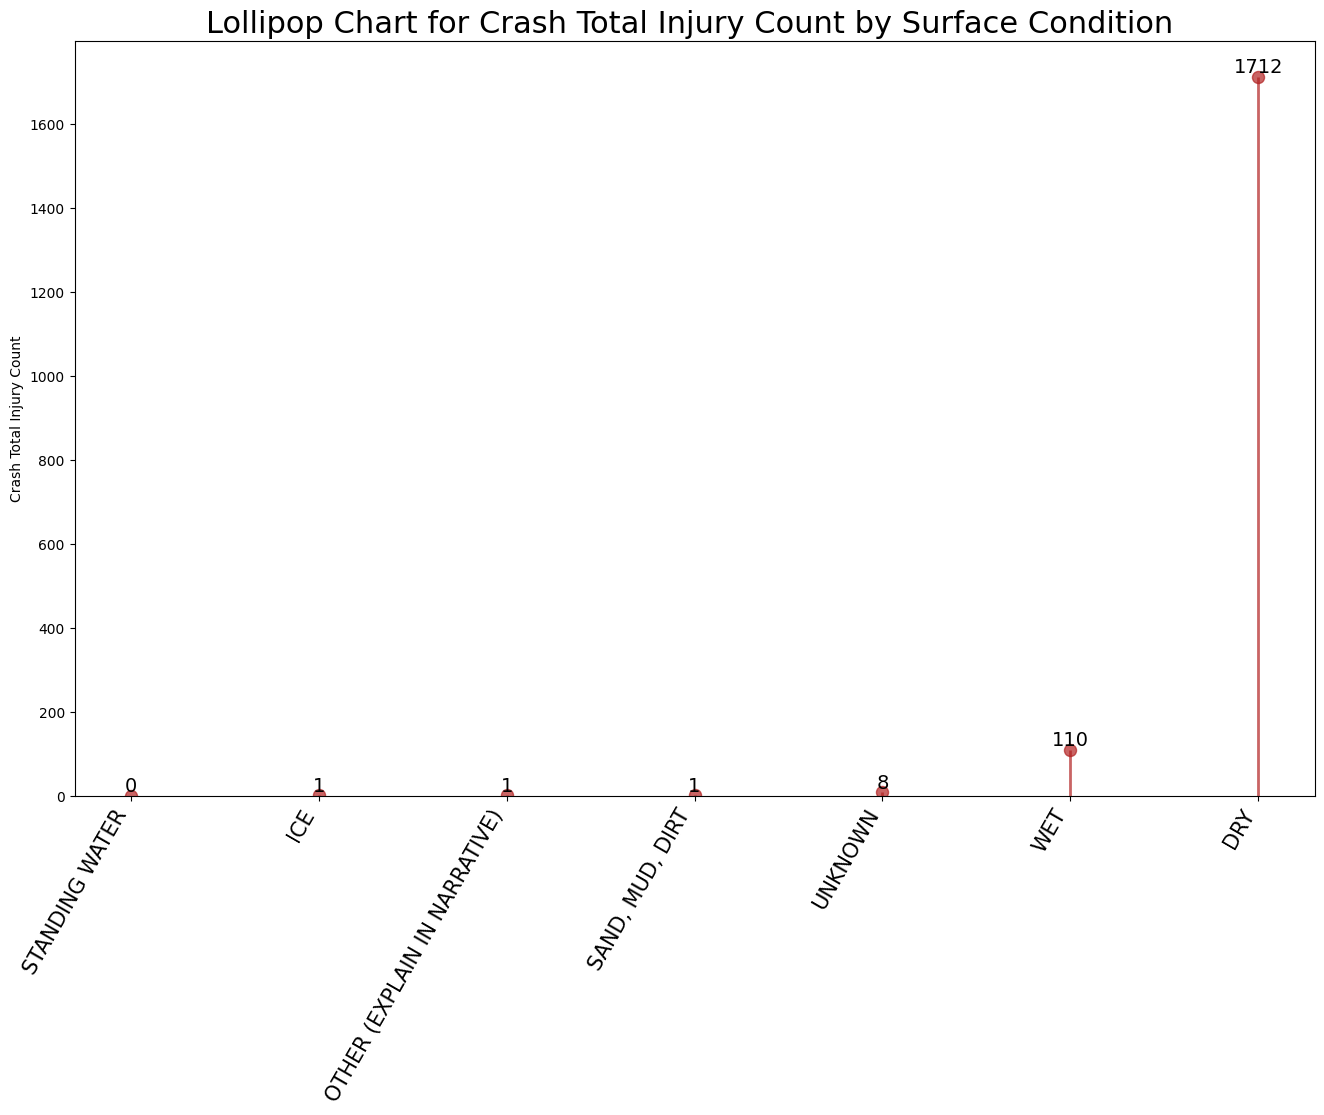

In [ ]:
#prepare data
df_pre = df[['Crash Total Injury Count','Surface Condition']].groupby(by='Surface Condition').sum()
df_pre.sort_values('Crash Total Injury Count', inplace=True)
df_pre.reset_index(inplace=True)
df_pre

#plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.vlines(x=df_pre.index, ymin=0, ymax=df_pre['Crash Total Injury Count'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df_pre.index, y=df_pre['Crash Total Injury Count'], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Crash Total Injury Count by Surface Condition ', fontdict={'size':22})
ax.set_ylabel('Crash Total Injury Count')
ax.set_xticks(df_pre.index)
ax.set_xticklabels(df_pre["Surface Condition"].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':15})
ax.set_ylim(0)

# Annotate
for row in df_pre.itertuples():
    ax.text(row.Index, row._2, 
    s=round(row._2,4),
    horizontalalignment= 'center',
    verticalalignment= "bottom", fontsize=14)

plt.show()

### By Categorical Variable Light Condition

In [ ]:
# Data
df_pre0 = df[['Crash Death Count','Light Condition']].groupby(by='Light Condition').sum()
df_pre0.sort_values('Crash Death Count', inplace=True)
df_pre0.reset_index(inplace=True)
df_pre0


fig = px.pie(df_pre0, values='Crash Death Count', names='Light Condition', title='Crash Death Count by Light Condition')
fig.show()

In [ ]:
# Data
df_pre0 = df[['Crash Total Injury Count','Light Condition']].groupby(by='Light Condition').sum()
df_pre0.sort_values('Crash Total Injury Count', inplace=True)
df_pre0.reset_index(inplace=True)
df_pre0


fig = px.pie(df_pre0, values='Crash Total Injury Count', names='Light Condition', title='Crash Total Injury Count by Light Condition')
fig.show()

### By Categorical Variable Person Helmet

In [ ]:
#prepare data
df_pre1 = df[['Crash Death Count',"Person Helmet"]].groupby(by="Person Helmet").sum()
df_pre1.sort_values('Crash Death Count', inplace=True)
df_pre1.reset_index(inplace=True)

fig = px.bar(df_pre1, x="Person Helmet", y='Crash Death Count',title='Crash Death Count by Person Helmet')

fig.show()

In [ ]:
#prepare data
df_pre1 = df[['Crash Total Injury Count',"Person Helmet"]].groupby(by="Person Helmet").sum()
df_pre1.sort_values('Crash Total Injury Count', inplace=True)
df_pre1.reset_index(inplace=True)

fig = px.bar(df_pre1, x="Person Helmet", y='Crash Total Injury Count',title='Crash Total Injury Count by Person Helmet')

fig.show()

## Visualization by Crash Year

In [ ]:
renaming = ['Crash Death Count', 
	'Crash Incapacitating Injury Count', 
	'Crash Non-incapacitating Injury Count', 
	'Crash Not Injured Count', 
	'Crash Possible Injury Count',
	'Crash Time',
	'Crash Year', 
	'Crash Total Injury Count', 
	'Crash Unknown Injury Count']
renaming[0].replace('Crash ', '')
renaming = {k:k.replace('Crash ', '') for k in renaming}

In [ ]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/taimoon/data-wrangling-school-project/main/Austin%20Bicycle%20Crashes%202010-2017%20revised%20subset.csv"
df=pd.read_csv(url)
df.set_index('Crash ID', inplace=True)
df.drop(['MercatorX', 'MercatorY'], axis=1, inplace=True)
df.rename(columns = renaming,inplace=True)

In [ ]:
from bokeh.plotting import figure
from bokeh.palettes import Spectral10
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [ ]:
fig = figure(plot_width=900, plot_height=700,
           y_range=(0, 450), x_range=(2010, 2017),
           x_axis_label = 'year', y_axis_label = 'total count',
           title="Austin Bicycle Crashes")
temp = df.groupby("Year").sum()
li = ['Death Count',
 'Incapacitating Injury Count',
 'Non-incapacitating Injury Count',
 'Not Injured Count',
 'Possible Injury Count',
 'Total Injury Count',
 'Unknown Injury Count']
for i, color in zip(li, Spectral10):
    fig.line(y = temp[i], x = temp.index, legend_label = i, color=color, line_width=3)

fig.legend.location = "top_right"
fig.legend.click_policy="mute"

show(fig)

From the visualization above,Not injured Count is the highest among all varaibles and Death count is the lowest among all avariable. 

One of the interest findings are 4 variables had the highest total count in 2011 simultaneously. They are Incapacitating Injury Count, Possible Injury Count, Total Injury Count, and Not Injury Count.

## Map Visualization
# Remark:
1. The time slider and injury sliders are not working together.
2. It is fine within the injury sliders
3. You may run the seperated file from command prompt

In [59]:
renaming = ['Crash Death Count', 
	'Crash Incapacitating Injury Count', 
	'Crash Non-incapacitating Injury Count', 
	'Crash Not Injured Count', 
	'Crash Possible Injury Count',
	'Crash Time', 
	'Crash Total Injury Count', 
	'Crash Unknown Injury Count']
renaming[0].replace('Crash ', '')
renaming = {k:k.replace('Crash ', '') for k in renaming}
renaming

{'Crash Death Count': 'Death Count',
 'Crash Incapacitating Injury Count': 'Incapacitating Injury Count',
 'Crash Non-incapacitating Injury Count': 'Non-incapacitating Injury Count',
 'Crash Not Injured Count': 'Not Injured Count',
 'Crash Possible Injury Count': 'Possible Injury Count',
 'Crash Time': 'Time',
 'Crash Total Injury Count': 'Total Injury Count',
 'Crash Unknown Injury Count': 'Unknown Injury Count'}

In [60]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/taimoon/data-wrangling-school-project/main/Austin%20Bicycle%20Crashes%202010-2017%20revised%20subset.csv"
df=pd.read_csv(url)
df.rename(columns = renaming,inplace=True)
import datetime
from datetime import time
df['Time'] = df['Time'].apply(time.fromisoformat)
df.head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Agency,At Intersection Flag,Construction Zone Flag,Construction Zone Workers Present Flag,Death Count,Incapacitating Injury Count,Non-incapacitating Injury Count,...,Roadway Relation,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,MercatorX,MercatorY
0,11243623,False,False,Austin Police Department,False,False,No,0,1,0,...,On Roadway,45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged",-1.087375e+07,3.540377e+06
1,12112069,False,False,Austin Police Department,False,False,No,0,0,2,...,On Roadway,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,-1.088093e+07,3.536402e+06
2,11376123,False,False,Austin Police Department,False,False,No,0,0,1,...,On Roadway,45,SL0111,1487,Dry,None,Clear,Not Worn,-1.087615e+07,3.539540e+06
3,11318193,False,False,Austin Police Department,False,False,No,0,0,1,...,On Roadway,35,W MARTIN LUTHER KING JR BLVD,398,Dry,Marked Lanes,Clear,"Worn, Unk Damage",-1.088053e+07,3.539795e+06
4,11286981,False,False,Austin Police Department,True,False,No,0,0,1,...,On Roadway,30,VICTORY DR,3801,Dry,Stop Sign,Clear,Not Worn,-1.088577e+07,3.534194e+06


In [61]:
def getRandomColor():
    import random
    colors = ['aqua', 'aquamarine', 'black', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate',
         'coral', 'cornflowerblue', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen',
         'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon',
         'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink',
         'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'forestgreen', 'fuchsia', 'gold', 'goldenrod',
         'gray', 'green', 'greenyellow', 'grey', 'hotpink', 'indianred', 'indigo', 'khaki', 'lavender', 'lawngreen', 'lime',
         'limegreen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple',
         'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue',
         'navy', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue',
         'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'sienna', 'silver',
         'skyblue', 'slateblue', 'slategray', 'slategrey', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato',
              'turquoise', 'violet', 'yellow', 'yellowgreen']
    return colors[random.randint(0, 101)]

In [62]:
from bokeh.plotting import figure
from bokeh.tile_providers import get_provider, WIKIMEDIA
from bokeh.io import output_notebook, curdoc, show
from bokeh.models import ColumnDataSource, RangeSlider
from bokeh.layouts import column, row
output_notebook()

Loading BokehJS ...

run the file from command prompt

In [63]:
from pyproj import Proj, transform
# cartography(map making field), all maps are projected
# then we use Mercator projection here
inProj = Proj(init='epsg:3857')
outProj = Proj(init='epsg:4326')

wikimedia = get_provider(WIKIMEDIA)

aus_lon1, aus_lat1 = transform(outProj,inProj, df['Longitude'].min(), df['Latitude'].min())
aus_lon2, aus_lat2 = transform(outProj,inProj,df['Longitude'].max(), df['Latitude'].max())
temp_df = df
df_src = ColumnDataSource(temp_df)

p = figure(plot_width=900, plot_height=700,
           x_range=(aus_lon1, aus_lon2), y_range=(aus_lat1, aus_lat2),
           x_axis_type="mercator", y_axis_type="mercator",
           tooltips=[("(Long, Lat)", "(@Longitude, @Latitude)")],
           title="Austin Bicycle Crashes")

p.add_tile(wikimedia)

circle_glyph = p.circle(x="MercatorX", y="MercatorY",
         size=7,
         fill_color="red", line_color="red",
         fill_alpha=0.9,source=df_src)

C:\Users\Leong Teng Man\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Leong Teng Man\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\LEONGT~1\AppData\Local\Temp/ipykernel_11640/2102439222.py:9: DeprecationWarning: This function is deprecated. See: https://pyproj4.gi

In [64]:
hour_slider = RangeSlider(start=0, end=23, step=1,value = (0,23), title="hour")
def time_event_handler(attr, old, new):
	new_df = temp_df
	new_start, new_end = hour_slider.value
	new_start = time(new_start)
	new_end = time(new_end)
	df_src.data = new_df[new_df['Time'].between(new_start,new_end)]
	circle_glyph.glyph.fill_color = getRandomColor()
hour_slider.on_change('value', time_event_handler)

In [65]:
from functools import reduce
severity_types = [
    'Death Count',
    'Incapacitating Injury Count',
    'Non-incapacitating Injury Count',
    'Not Injured Count',
    'Possible Injury Count',
    'Total Injury Count',
    'Unknown Injury Count']


ctor = lambda k: RangeSlider(start = 0, end=df[k].max(), value=(0, df[k].max()), step=1, title=k)
# the names are kept so that we can refer them in dataframe easily
severity_sliders = {k:ctor(k) for k in severity_types} 

def update_data_count(attr, old, new):
    new_df = temp_df

    for slider_name in severity_sliders:
        slider = severity_sliders[slider_name]
        new_start, new_end = slider.value
        new_df = new_df[new_df[slider_name].between(new_start,new_end)]

    df_src.data = new_df
    circle_glyph.glyph.fill_color = getRandomColor()

slider_li = [severity_sliders[k] for k in severity_sliders]
layout = reduce(lambda acm, cur: column(acm, cur), slider_li[1:], slider_li[0])

for slider in slider_li:
    slider.on_change('value', update_data_count)

In [66]:
layout = row(layout, p)
layout = column(layout, hour_slider)
curdoc().add_root(layout)
show(layout)

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



# Summary

Summary for each selected integer attribute

| Crash Death Count | Crash Incapacitating Injury Count | Crash Non-incapacitating Injury Count | Crash Not Injured Count | Crash Possible Injury Count | Crash Total Injury Count | Crash Unknown Injury Count |             |
| ----------------: | --------------------------------: | ------------------------------------: | ----------------------: | --------------------------: | -----------------------: | -------------------------: | ----------- |
|             count |                       2467.000000 |                           2467.000000 |             2467.000000 |                 2467.000000 |              2467.000000 |                2467.000000 | 2467.000000 |
|              mean |                          0.006486 |                              0.191731 |                0.636400 |                    1.208350 |                 0.262262 |                   1.090393 | 0.158897    |
|               std |                          0.080288 |                              1.161059 |                0.564872 |                    0.931757 |                 0.486358 |                   1.208050 | 0.416466    |
|               min |                          0.000000 |                              0.000000 |                0.000000 |                    0.000000 |                 0.000000 |                   0.000000 | 0.000000    |
|               25% |                          0.000000 |                              0.000000 |                0.000000 |                    1.000000 |                 0.000000 |                   1.000000 | 0.000000    |
|               50% |                          0.000000 |                              0.000000 |                1.000000 |                    1.000000 |                 0.000000 |                   1.000000 | 0.000000    |
|               75% |                          0.000000 |                              0.000000 |                1.000000 |                    1.000000 |                 0.000000 |                   1.000000 | 0.000000    |
|               max |                          1.000000 |                             14.000000 |                4.000000 |                    9.000000 |                 5.000000 |                  15.000000 | 4.000000    |

# Overall Summary

There is no interesting relationship between variables found and to be visualized. Nevertheless, we could see the change for each integer attribute year by year. Furthermore, we see that how accidents distributed across the places. Given any place on the visualized map, the more the dots, the more human activities.

## Reference

https://seaborn.pydata.org/index.html

https://medium.com/@polanitzer/correlation-in-python-find-statistical-relationship-between-variables-bfeb323c16d6

https://www.pluralsight.com/guides/finding-relationships-data-with-pythonhttps://matplotlib.org/3.5.2/index.html

https://pandas.pydata.org/docs/reference/index.html

https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6

https://plotly.com/graphing-libraries/

https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

https://analyticsindiamag.com/tutorial-on-missingno-python-tool-to-visualize-missing-values/